<a href="https://colab.research.google.com/github/YousraAshour/machine_learning/blob/main/K_Means_Clustering_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.metrics import r2_score , mean_squared_error
from scipy.spatial.distance import cdist 
from sklearn import preprocessing
from sklearn.datasets import load_iris


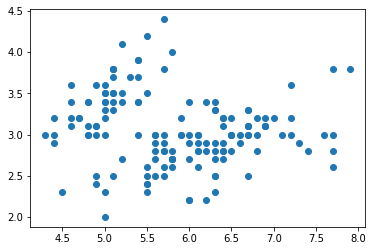

In [2]:
# data=pd.read_csv(r'/content/MultipleLR.csv - MultipleLR.csv.csv',header=None)
# data=np.asarray(data)
x,y=load_iris(return_X_y=True)
x=x[:,:2].reshape(-1,2)
plt.scatter(x[:,0],x[:,1])

In [3]:
# if np.isnan(distances).any() :
#       # print('distshape',distances.shape)
#       print('distances na') 



In [5]:
# Choose K and Randomly initialize Centriods

def KMeans(x,k,iters):
  # x= preprocessing.normalize(x)
  rand_idx = np.random.choice(x.shape[0], k, replace=False)
  # print('idx', rand_idx)
  centroids = x[rand_idx, :]
  # print('cen', centroids)
  loss=[]
  
  iter=0
  for i in range(iters):
    
    distances = cdist(x, centroids ,'euclidean')
    if np.isnan(distances).any() :
      # print('distshape',distances.shape)
      # print('distances na') 
      break

    k_idx = np.array([np.argmin(i) for i in distances])
    # print('kidx',k_idx)
    # k_idx=np.argmin(distances, axis=1)
    if np.isnan(k_idx).any() :
      print('na k_idx')

    diff= 0
    for a in range(k):
      d= x[k_idx==a] - centroids[a]
      diff = diff + np.sum(d**2)
      if np.isnan(d).any():
        print('na d')

    dist_fun = (1/x.shape[0]* diff)
    loss.append(dist_fun)
    if np.isnan(dist_fun).any():
        print('na dist_fun')


    new_centers=np.empty([k,x.shape[1]])
    for j in range(k):
          if np.isnan(x[k_idx == j]).any() :
            new_centers=centroids
            continue
          new_centers[j] = np.mean(x[k_idx == j],axis = 0)

    iter+=1
    
    # if np.any(new_centers-centroids) < 0.001:
    if np.count_nonzero(np.array(centroids)-np.array(new_centers)) == 0:
      break
    centroids=new_centers

  plt.scatter(x[:,0],x[:,1],c=k_idx, s=40)

  # print('iters', iter)
  return centroids, dist_fun, loss, k_idx


# Optimization and choosing the best Centriods 
# def best_centroid():

#   for i in range (100):




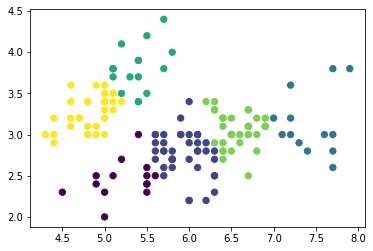

In [6]:
centroids, dist_fun, loss, k_idx=KMeans(x,6,300)


In [7]:
# plotting for different K
def Optimum_centroids(x,K,iters=300,r=100):

  centroids=[]
  distortion=[]
  k=[]
  for i in range(10):
    cen,dist, losses,k_idx = KMeans(x,K,300)
    # print(dist.shape)
    centroids.append(cen)
    distortion.append(dist)
    k.append(k_idx)
  k=np.array(k)
  centroids=np.array(centroids)
  

  # print('cen', centroids, '\n','dist',distortion)
  best_dist= np.min(distortion)
  # print(best_dist)
  best_centroid= centroids[distortion.index(best_dist)]
  # print(best_centroid)
  # print('best cen', besdistortion.index(best_dist)t_centroid, '\n best dist', best_centroid)
  kidx= k_idx[distortion.index(best_dist)]
  plt.scatter(x[:,0],x[:,1],c=k_idx, s=40)
  plt.scatter(best_centroid[:,0],best_centroid[:,1], color='red')

  return best_centroid, best_dist




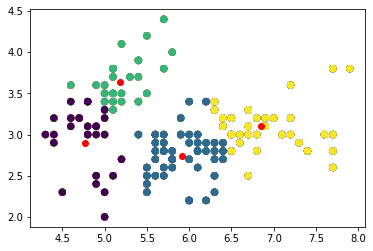

In [8]:
cen, dist=Optimum_centroids(x,4,300,100)
# print(cen,dist)
# if np.isnan(cen).any() :
#       print('cen na')

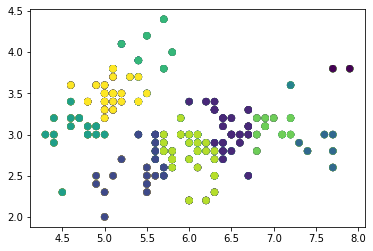

In [9]:
cens=[]
dists=[]
for i in range (1,11):
    cen, dist,loss, k_idx= KMeans(x,i,300)
    cens.append(cen)
    dists.append(dist)



  

[0.8698351111111113,
 0.38802728526044483,
 0.24724180164819554,
 0.189424354490092,
 0.14001417321499626,
 0.12908306172839507,
 0.10457878912275466,
 0.10243318694463434,
 0.08292354255878596,
 0.0847646420328038]

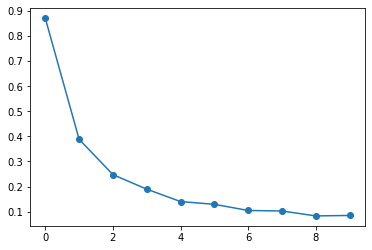

In [11]:
plt.plot(dists,marker='o')
dists

In [12]:
rand_idx = np.random.choice(x.shape[0], 4, replace=False)
centroids = x[rand_idx, :]
loss=[]
  
iter=0
for i in range(100):
    
    distances = cdist(x, centroids ,'euclidean')
    print(distances)
    # print(distances.shape)
     
    # k_idx = np.array([np.argmin(i) for i in distance])
    k_idx=np.argmin(distances, axis=1)
    
diff= 0
for a in range(2):
    d= x[k_idx==a] - centroids[a]
    diff = diff + np.sum(d**2)

dist_fun = 1/x.shape[0]* diff
loss.append(dist_fun)

if dist_fun == np.nan :
    print('dist',dist_fun)
    print('dist',distances)

# new_centers=np.empty([k,x.shape[1]])
# for l in range(10):
#   for j in range(2):
#     new_centers[j] = np.mean(x[k_idx == j], axis = 0)
#     iter+=1
#     print('new', new_centers)

Streaming output truncated to the last 5000 lines.
 [1.30384048 1.33416641 1.08166538 0.78102497]
 [1.06301458 1.20415946 1.26491106 0.        ]
 [2.13775583 2.18403297 1.92353841 1.33416641]
 [1.39283883 1.47648231 1.3453624  0.53851648]
 [1.55241747 1.61554944 1.42126704 0.76157731]
 [2.63058929 2.66833281 2.37697286 1.82482876]
 [0.90553851 1.1045361  1.48660687 0.92195445]
 [2.35372046 2.40416306 2.14709106 1.5132746 ]
 [1.92353841 2.02484567 1.91049732 0.92195445]
 [2.2090722  2.2        1.82482876 1.6643317 ]
 [1.5132746  1.55241747 1.30384048 0.86023253]
 [1.56524758 1.6643317  1.56204994 0.6       ]
 [1.84390889 1.8973666  1.6643317  1.04403065]
 [1.14017543 1.30384048 1.43178211 0.2236068 ]
 [1.         1.13137085 1.17046999 0.1       ]
 [1.41421356 1.45602198 1.22065556 0.78102497]
 [1.55241747 1.61554944 1.42126704 0.76157731]
 [2.72946881 2.70739727 2.30217289 2.19544984]
 [2.81602557 2.87923601 2.64196896 1.90262976]
 [1.56204994 1.72046505 1.80277564 0.53851648]
 [1.91049